In [11]:
import pandas as pd
df = pd.read_csv('simple-dataset.csv',header=0)

# normalize the data
age_mean = df['Age'].mean()
age_std = df['Age'].std()
df['Age'] = (df['Age'] - age_mean) / age_std
X = df['Age']
y = df['Purchase']

In [12]:
from SimpleLogisticRegression import SimpleLogisticRegression
my_model = SimpleLogisticRegression(0,0)
my_model.fit(X,y, 0.003, 10000)

Epoch:  0 Cost:  0.6928373860974436
Epoch:  1000 Cost:  0.5283572205720759
Epoch:  2000 Cost:  0.4813760667458402
Epoch:  3000 Cost:  0.46375254969151314
Epoch:  4000 Cost:  0.45591665972448453
Epoch:  5000 Cost:  0.4520513690409178
Epoch:  6000 Cost:  0.4500121925951766
Epoch:  7000 Cost:  0.44888615211369787
Epoch:  8000 Cost:  0.4482440222039817
Epoch:  9000 Cost:  0.44786922089585635


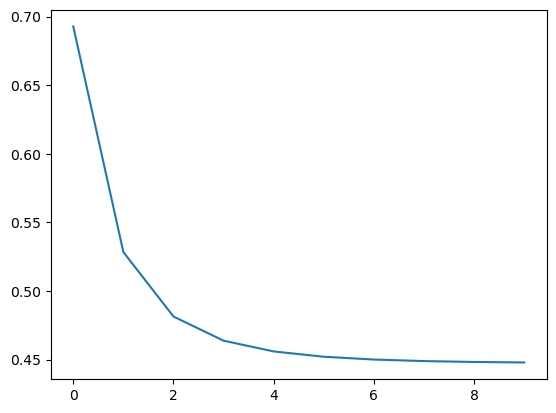

In [13]:
import matplotlib.pyplot as plt
plt.plot(my_model.costs)

In [14]:
from sklearn.linear_model import LogisticRegression
sk_model =  LogisticRegression()
sk_model.fit(X.values.reshape(-1,1),y)

LogisticRegression()

In [15]:
print("My model w and b: ", my_model.w, my_model.b)
print("Sklearn model w and b: ", sk_model.coef_, sk_model.intercept_)

My model w and b:  1.77111811578081 0.22876351701510508
Sklearn model w and b:  [[1.67147943]] [0.2281681]


In [16]:
# test the model
age = 25
y_test = (age - age_mean) / age_std
print(sk_model.predict_proba([[y_test]]))
print(my_model.predict_proba(y_test))

[[0.80722186 0.19277814]]
[0.8220693674712364, 0.17793063252876365]


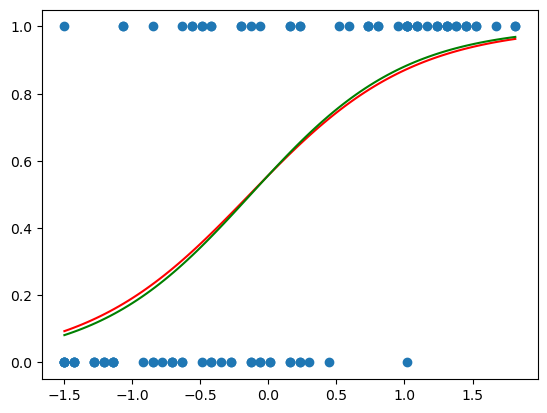

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

import numpy as np
X_test = np.linspace(X.min(),X.max(),100)
sk_pred = sk_model.predict_proba(X_test.reshape(-1,1))[:,1]
my_pred = my_model.predict_proba(X_test)[1]

plt.plot(X_test,sk_pred, color='red')
plt.plot(X_test,my_pred, color='green')

In [18]:
# Multiple Logistic Regression

import pandas as pd
df = pd.read_csv('multiple-dataset.csv')

age_mean = df['Age'].mean()
age_std = df['Age'].std()
income_mean = df['Income'].mean()
income_std = df['Income'].std()

# normalize with mean and standard deviation
df['Age'] = (df['Age'] - df['Age'].mean())/df['Age'].std()
df['Income'] = (df['Income'] - df['Income'].mean())/df['Income'].std()

X = df[['Age','Income']]
X = X.values.reshape(-1,2)
y = df['Purchase']

In [19]:
from sklearn.linear_model import LogisticRegression
sk_model =  LogisticRegression()
sk_model.fit(X,y)

LogisticRegression()

In [20]:
from MultipleLogisticRegression import MultipleLogisticRegression
import numpy as np
m,n = X.shape
w_init = np.zeros(n)
my_model = MultipleLogisticRegression(w_init,0)
my_model.fit(X,y, 0.1, 1000)

Epoch:  0 Cost:  0.6822008336307346
Epoch:  100 Cost:  0.45408229030826497
Epoch:  200 Cost:  0.4436017070000578
Epoch:  300 Cost:  0.44217159932450917
Epoch:  400 Cost:  0.4419170244971933
Epoch:  500 Cost:  0.4418671346971024
Epoch:  600 Cost:  0.4418569617028436
Epoch:  700 Cost:  0.4418548510707179
Epoch:  800 Cost:  0.44185440975692364
Epoch:  900 Cost:  0.4418543171569127


In [21]:
# print w and b
print("My model w and b: ", my_model.w, my_model.b)
print("Sklearn model w and b: ", sk_model.coef_, sk_model.intercept_)

My model w and b:  [1.83141729 0.27627589] 0.2552777720776322
Sklearn model w and b:  [[1.64629755 0.2608515 ]] [0.22928698]


In [22]:
# predict the probability of purchase for a 25 year old with an income of 50000
age = (60 - age_mean)/age_std
income = (50000 - income_mean)/income_std

print(sk_model.predict_proba([[age,income]]))
print(my_model.predict_proba([age,income]))

[[0.05954435 0.94045565]]
[0.04439628722991118, 0.9556037127700888]
